# **CUSTOMER SEGMENTATION**

**Importing Essential Libraries**

In [397]:
import numpy as np
import pandas as pd

**Loading Essential Libraries**

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [399]:
url='https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
customer_data=pd.read_csv(url)

**Exploring the Dataset**

In [400]:
# Returns number of rows and columns of the dataset
customer_data.shape

(200, 5)

The Dataset contains **200 rows** and **5 columns**.

In [401]:
# Returns an object with all of the column headers 
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

The Column Headers are 

*   *CustomerID*
*   *Gender*
*   *Age*
*   *Annual Income (k$)*
*   *Spending Score (1-100)*











In [402]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**Dataset**

In [403]:
# Returns the Dataset 
customer_data.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [404]:
# Returns basic information on all columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [405]:
# Returns basic statistics on numeric columns
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Checking for Null Values**

In [406]:
# Returns true for a column having null values, else false
customer_data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**Data Cleaning**

In [407]:
# Creating the copy of dataset
customer_data_copy = customer_data.copy(deep=True)

In [408]:
# Checking the copy of dataset
customer_data_copy.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [409]:
# Dropping the column of 'CustomerID' as it does not provide any value
customer_data_copy.drop('CustomerID', axis=1, inplace=True)

**Data Visualization**

In [410]:
customer_data_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

**Gender Visualization**

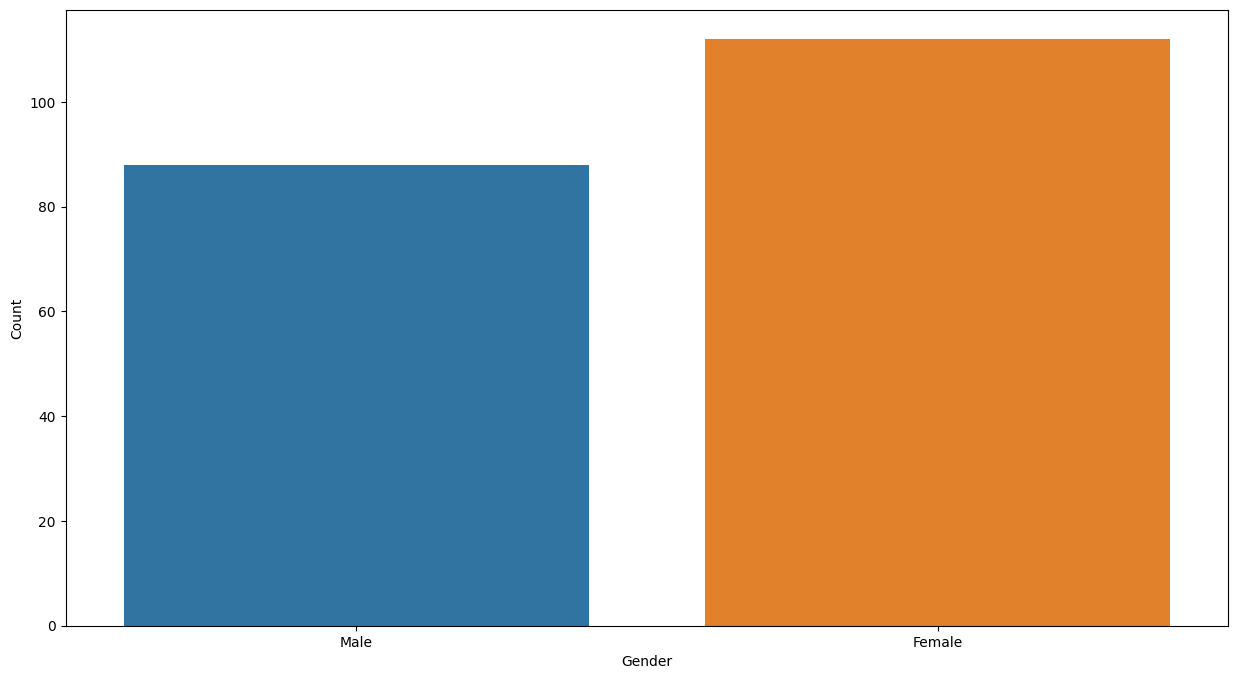

In [411]:
# Visualising the columns 'Gender' using Countplot
plt.figure(figsize=(15,8))
sns.countplot(x='Gender', data=customer_data_copy)
plt.xlabel('Gender')
plt.ylabel('Count');

***Gender Plot-Observation***

From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.

**Age Plot**

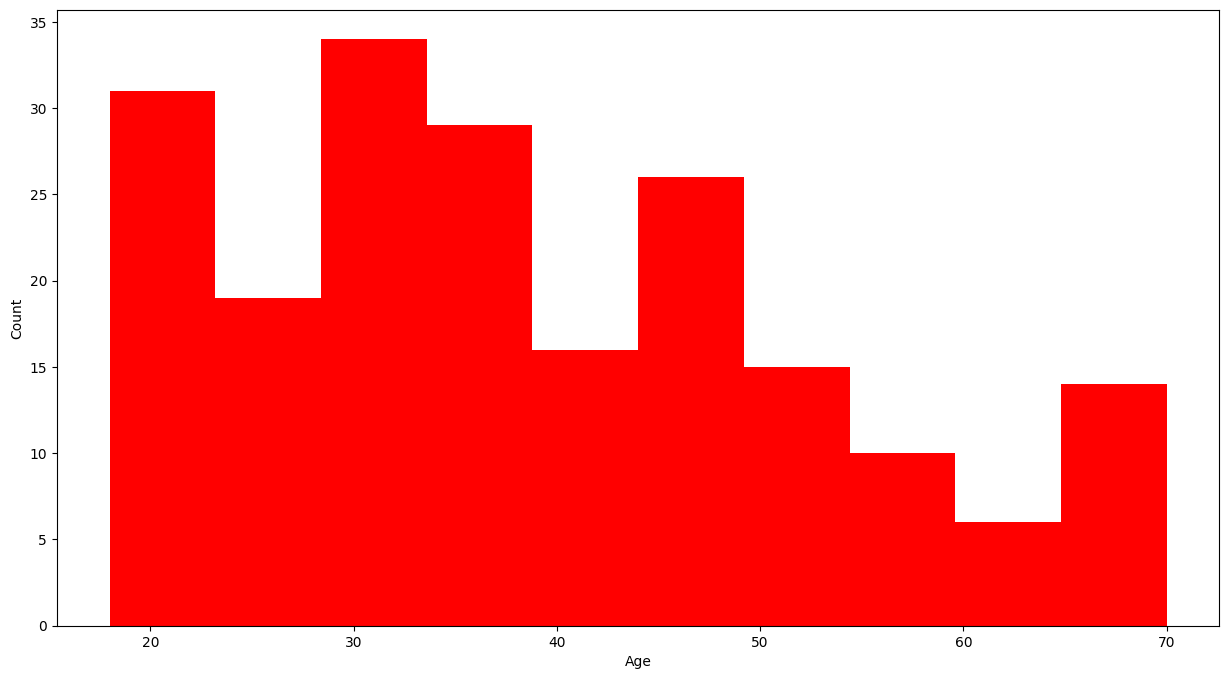

In [412]:
# Visualising the columns 'Age' using Histogram
plt.figure(figsize=(15,8))
plt.hist(x=customer_data_copy['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

***Age Plot-Observation***

From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall,they are
*   *15-22 years*
*   *30-40 years*
*   *45-50 years*






## **Age Vs Spending Score**

***Visualising the columns 'Age' and 'Spending Score (1-100)' using Scatterplot***

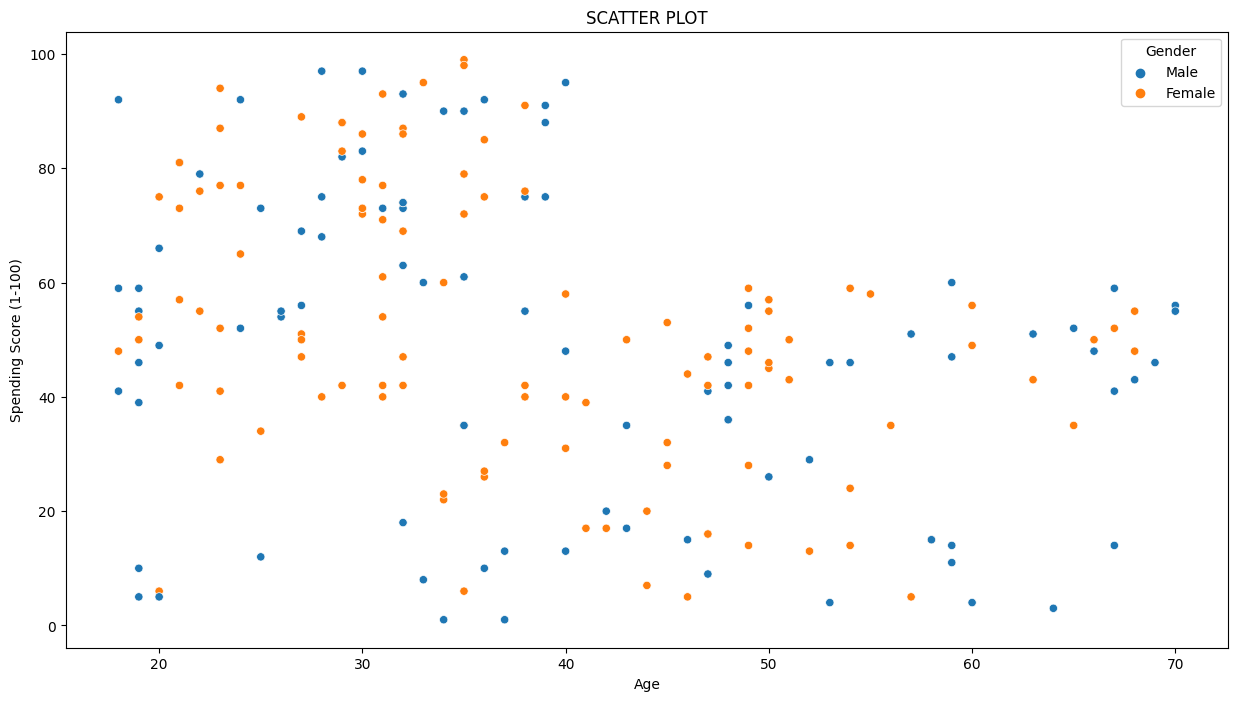

In [413]:
plt.figure(figsize=(15,8))
plt.title("SCATTER PLOT")
sns.scatterplot(data=customer_data_copy, x='Age', y='Spending Score (1-100)', hue='Gender');

***Visualising the columns 'Age' and 'Spending Score (1-100)' using Jointplot***

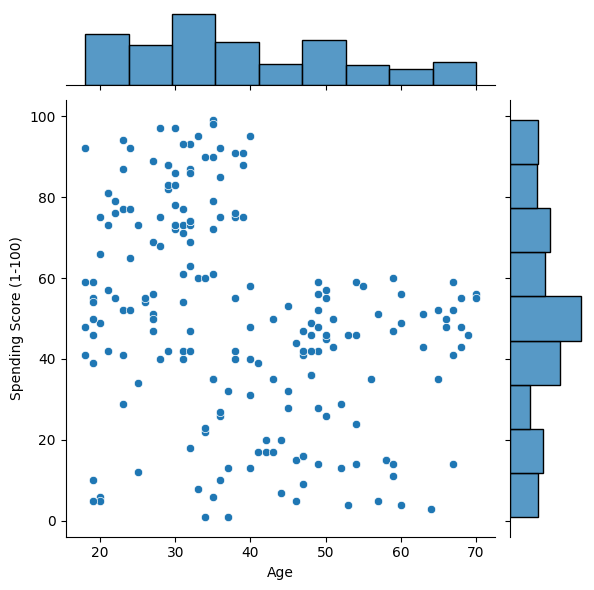

In [414]:
#jointplot
sns.jointplot(data=customer_data_copy, x='Age', y='Spending Score (1-100)');


***Age Vs Spending Score - Observation***



1.    From the Age Vs Spending Score plot we observe that ***customers whose spending score is more than 65 have their Age in the range of 15-42 years***. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of ***more Females than Males*** .

2.    Also, the customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.


## **Annual Income Vs Spending Score**

***Visualising the columns 'Annual Income (k$)' and 'Spending Score (1-100)' using Scatterplot***

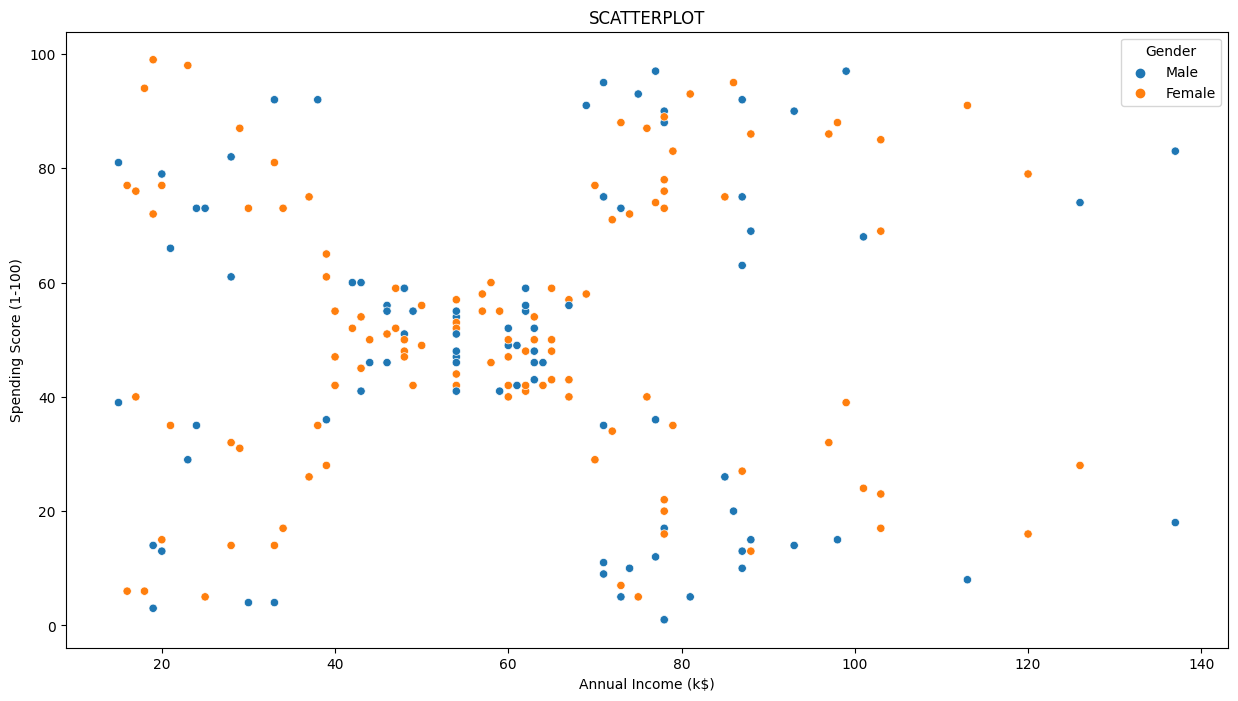

In [415]:
plt.figure(figsize=(15,8))
plt.title("SCATTERPLOT")
sns.scatterplot(data=customer_data_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender');

***Visualising the columns 'Annual Income (k$)' and 'Spending Score (1-100)' using Jointplot***

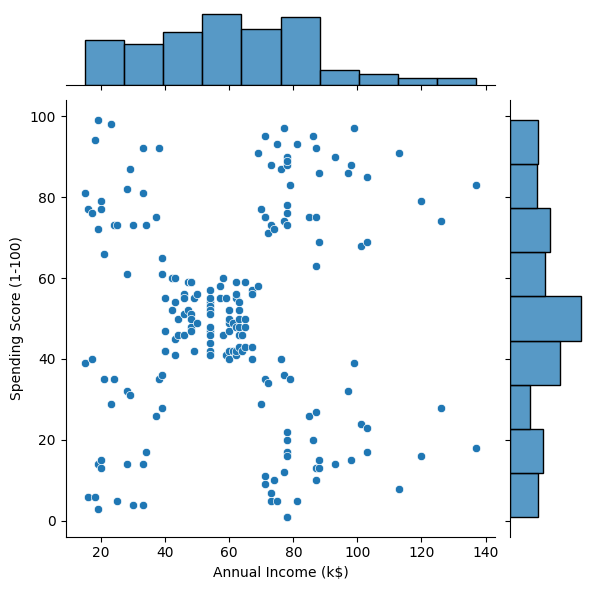

In [416]:
# jointplot
sns.jointplot(data=customer_data_copy, x='Annual Income (k$)', y='Spending Score (1-100)');

***Annual Income Vs Spending Score - Observation***

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:

*    High Income, High Spending Score *(Top Right Cluster)*
*    High Income, Low Spending Score *(Bottom Right Cluster)*
*    Average Income, Average Spending Score *(Center Cluster)*
*    Low Income, High Spending Score *(Top Left Cluster)*
*    Low Income, Low Spending Score *(Bottom Left Cluster)*







# **Data Preprocessing** 

**Selecting 'Annual Income' and 'Spending Score' as the features for clustering**

In [417]:
X = customer_data_copy.iloc[:, [2,3]]
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# **Finding optimal number of clusters using Elbow Method**

**Calculating WCSS values for 1 to 10 clusters**

In [418]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init=10)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

**Plotting the WCSS values**

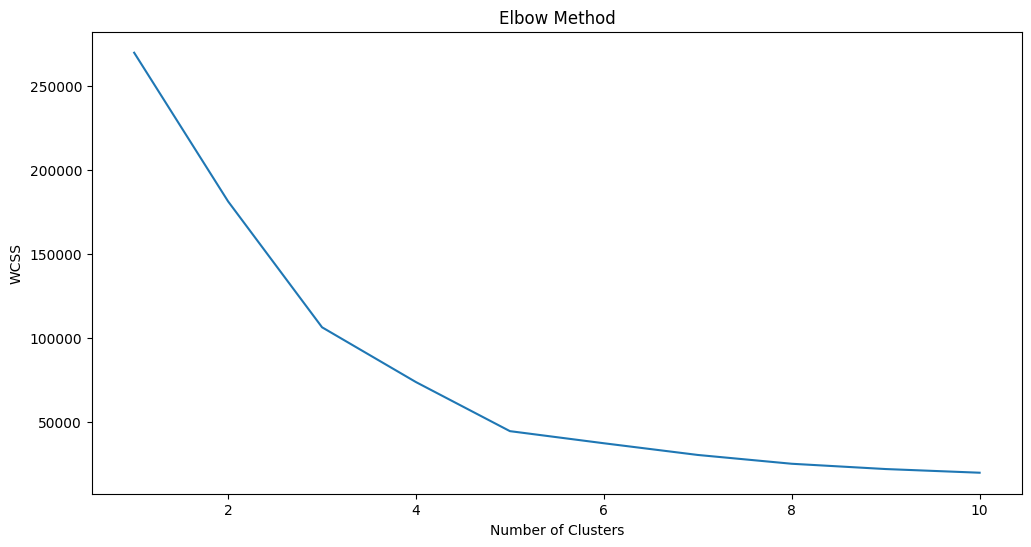

In [419]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

*From the above plot it is observed that 5 clusters are optimal for the given dataset because wcss doesn't reduce much after k=5.*

# **Feature Scaling**

In [420]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

*Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values
Model Building.*

# **Model Building**

In [421]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)


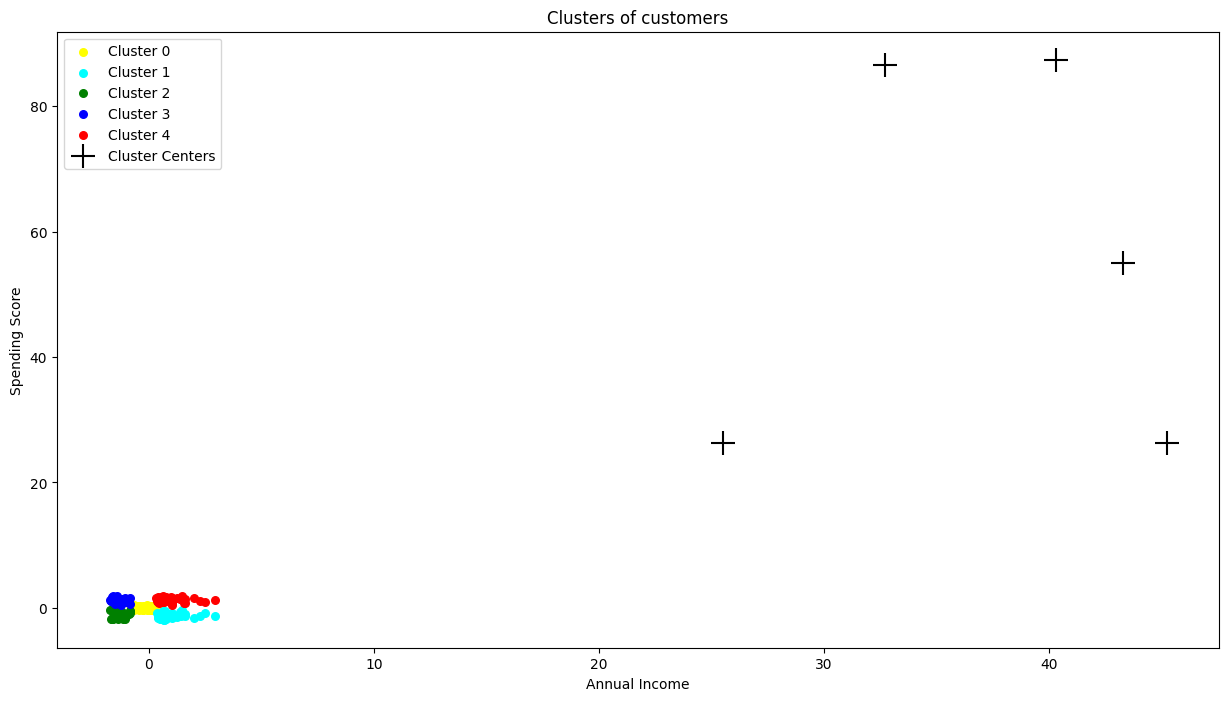

In [422]:
kmeans_model = KMeans(n_clusters=5, n_init=10)
kmeans_model.fit(customer_data[['Age','Annual Income (k$)','Spending Score (1-100)']])
# Visualising the clusters
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 4')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=300, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [423]:
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

In [424]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42,n_init=10)

In [425]:
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [426]:
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42,n_init=10)

kmeans_model_new.fit_predict(customer_data[['Age','Annual Income (k$)','Spending Score (1-100)']])
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
customer_data["clusters"] = kmeans_model_new.labels_

In [427]:
customer_data.head()
plt.figure(figsize=(15,10))

figure = px.scatter_3d(customer_data,
                    color='clusters',
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

<Figure size 1500x1000 with 0 Axes>

#**Clustering - Observation**



*  **Average Income, Average Spending Score (Cluster 0)** -Don't target these customers since they have less income and need to save money.

*   **High Income, Low Spending Score (Cluster 1)** - Can target these set of customers by providing them with Low cost EMI's etc.

*   **Low Income, Low Spending Score (Cluster 2)** - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 4 customers.

*   **Low Income, High Spending Score (Cluster 3)** - May or may not target these group of customers based on the policy of the mall.

*   **High Income, High Spending Score (Cluster 4)** - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

**Distribution of the clusters with count**

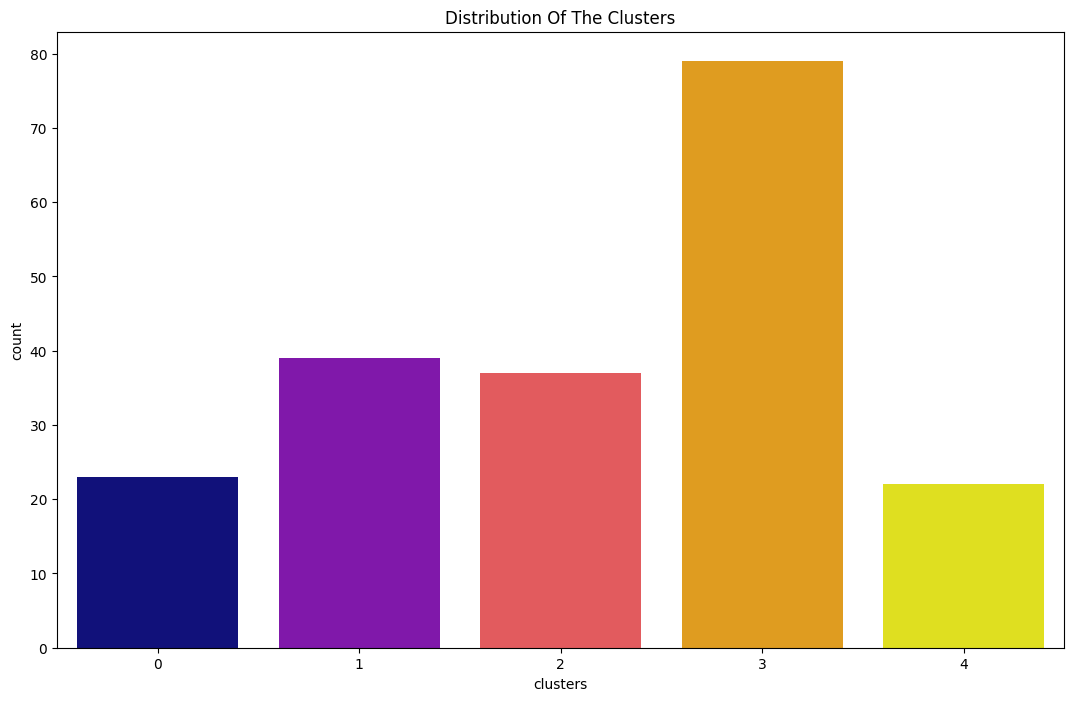

In [428]:
pal = ['darkblue',"#8a00c2","#f94449","#FFA500","yellow"]
plt.figure(figsize=(13,8))
pl = sns.countplot(x=customer_data['clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()